# Reading Data

#### Reading Data for iris dataset

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("irisself.txt") # Import data
#df = df.ix[:,'SalesID':'ProductGroupDesc'] # Remove extraneous features
#df # Show our data
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Splitting tran test Dataset for IRIS

In [2]:
input_df=df.iloc[:,0:4]
output_df=df.iloc[:,4]
from sklearn.model_selection import train_test_split
train_input_df, test_input_df, train_output_df, test_output_df = train_test_split(input_df, output_df, test_size=0.33, random_state=0,shuffle=True)
#print(train_output_df.iloc[1:20])

#### Reading data for Real estate dataset

In [3]:
df2 = pd.read_csv("Real estate valuation data set.csv") # Import data
df2.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Splitting training Test Dataset

In [4]:
i=df2.iloc[:,1:7]
o=df2.iloc[:,7]
t_in=i.iloc[0:300,:]
#print(training_input_feat_df)  v
T_in=i.iloc[301:414,:]
#print(testing_input_feat_df)    v
t_out=o.iloc[0:300]
#print(training_output_feat_df)
T_out=o.iloc[301:414]
#print(testing_output_feat_df)

# Question Number 1

### Qn No: 1 (A) - KNN Function

In [5]:
import scipy.spatial.distance

#print(train_input_df.iloc[:,0])
def KNN_predict(method,train_input_df,train_output_df,test_input_df,k,dista):
    #k=10
    #dista='Cos'
    #method='cla'
    final_list=[]
    for t in range(len(test_input_df)):
        #case=test_input_df.iloc[0,:]
        dist=[]
        final_indices=[]
        case=test_input_df.iloc[t,:]
        #print(case)
        if (dista=='Euc'):
            for x in range(len(train_input_df)):
                temp=np.sqrt(np.sum((train_input_df.iloc[x,:]-case)**2))
                dist.append(temp)
        elif (dista=='Man'):
            for x in range(len(train_input_df)):
                temp=np.sum(abs((train_input_df.iloc[x,:]-case)))
                dist.append(temp)
        elif (dista=='Cos'):
            for x in range(len(train_input_df)):
                #temp=np.sum(abs((train_input_df.iloc[x,:]-case)))
                temp=scipy.spatial.distance.cosine(train_input_df.iloc[x,:],case)
                dist.append(temp)
            #print(dist)
        indic=np.argsort(dist)
        d2=np.asarray(dist)
        #print(d2[indic])
        
        final_indices=indic[0:k]
        #print(final_indices)
        neighbours_in=train_input_df.iloc[final_indices]
        n_out=[]
        for c in final_indices:
            n_out.append(train_output_df.iloc[c])
        #print(n_out)
        #print(dist.asarray[indic])
        if (method == 'cla'):
            t=set(n_out)
            out=max(set(n_out),key=n_out.count)
        elif (method == 'reg'):
            out=((np.sum(n_out))/k)
        #print(case)
        final_list.append(out)
    #print(final_list)
    return final_list
    

#### Calling KNN Predict Function for all three distance parameter(Euclidiean, Manhattan, Cosine)

In [6]:
res1=KNN_predict(method='cla',train_input_df=train_input_df,train_output_df=train_output_df,test_input_df=test_input_df,k=5,dista='Euc')
#print(res)
res2=KNN_predict(method='cla',train_input_df=train_input_df,train_output_df=train_output_df,test_input_df=test_input_df,k=5,dista='Man')
res3=KNN_predict(method='cla',train_input_df=train_input_df,train_output_df=train_output_df,test_input_df=test_input_df,k=5,dista='Cos')
import sklearn
acc1=sklearn.metrics.accuracy_score(test_output_df,res1)
acc2=sklearn.metrics.accuracy_score(test_output_df,res2)
acc3=sklearn.metrics.accuracy_score(test_output_df,res3)

print("Accuracy for \n","Eucledian",acc1,"Manhattan",acc2,"Cosine",acc3)

Accuracy for 
 Eucledian 0.98 Manhattan 0.98 Cosine 0.96


### Qn No: 1 (B) -  Varying number of Features and Train instances

In [7]:
import time
#print(train_output_df)
time_list=[]
for x in range(1,5):
    for y in range (30,len(train_input_df)-1,20):
        t=0
        #print("no of features", x, "Eample", y)
        start=time.time()
        tr=train_input_df.iloc[0:y,0:x]
        ts=train_output_df.iloc[0:y]
        res=KNN_predict(method='cla',train_input_df=tr,train_output_df=ts,test_input_df=test_input_df,k=5,dista='Euc')
        end=time.time()
        t=end-start
        print("No of Features:", x, "No of Example", y,"Time taken",t)
        time_list.append(t)
#print(time_list)

No of Features: 1 No of Example 30 Time taken 6.246429681777954
No of Features: 1 No of Example 50 Time taken 10.004082441329956
No of Features: 1 No of Example 70 Time taken 12.760034799575806
No of Features: 1 No of Example 90 Time taken 14.743438005447388
No of Features: 2 No of Example 30 Time taken 5.275734186172485
No of Features: 2 No of Example 50 Time taken 9.8189537525177
No of Features: 2 No of Example 70 Time taken 12.122608661651611
No of Features: 2 No of Example 90 Time taken 15.002602577209473
No of Features: 3 No of Example 30 Time taken 4.775403022766113
No of Features: 3 No of Example 50 Time taken 8.498016834259033
No of Features: 3 No of Example 70 Time taken 11.62622618675232
No of Features: 3 No of Example 90 Time taken 14.510303974151611
No of Features: 4 No of Example 30 Time taken 2.5718419551849365
No of Features: 4 No of Example 50 Time taken 4.5001654624938965
No of Features: 4 No of Example 70 Time taken 5.954209804534912
No of Features: 4 No of Example 90

#### Theoretical Time complexity for KNN is O(kdn) n= no of eamples d= no of features
#### With increase in no of features: runtime decreases
#### With increase in no of examples: runtime increases

#### Reshaping time matrix

In [8]:
time_list=np.asarray(time_list)
np.reshape(time_list,[-1,4])

array([[ 6.24642968, 10.00408244, 12.7600348 , 14.74343801],
       [ 5.27573419,  9.81895375, 12.12260866, 15.00260258],
       [ 4.77540302,  8.49801683, 11.62622619, 14.51030397],
       [ 2.57184196,  4.50016546,  5.9542098 ,  8.45598888]])

### Running for Regression Problem

In [9]:
res2=KNN_predict(method='reg',train_input_df=t_in,train_output_df=t_out,test_input_df=T_in,k=5,dista='Euc')

# Question Number 2

### 2(a) 5-fold Cross validation on train test and validation dataset for K=1 to5

In [24]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = df2.iloc[0:350,1:-1]
validn=df2.iloc[351:-1,1:-1]
# prepare cross validation
kfold = KFold(5, True, 1)
# enumerate splits
from sklearn.neighbors import KNeighborsRegressor
test_error=[]
train_error=[]
validn_error=[]
for knn in range(1,5):
    for train, test in kfold.split(data):
        neigh = KNeighborsRegressor(n_neighbors=knn)
        l=len(train)-2
        X=data.iloc[train,0:l]
        Y=data.iloc[train,-1]
        X_t=data.iloc[test,0:l]
        Y_t=data.iloc[test,-1]
        X_v=validn.iloc[:,0:l]
        Y_v=validn.iloc[:,-1]
        neigh.fit(X,Y)
        temp1=neigh.predict(X)
        temp2=neigh.predict(X_t)
        temp3=neigh.predict(X_v)
        e1=np.sqrt((np.sum((temp1-Y)**2))/len(Y))*1000
        e2=np.sqrt((np.sum((temp2-Y_t)**2))/len(Y_t))*1000
        e3=np.sqrt((np.sum((temp3-Y_v)**2))/len(Y_v))*1000
    
        train_error.append(e1)
        test_error.append(e2)
        validn_error.append(e3)
#np.reshape(np.asarray(train_error),(3,5))
train_np=np.asarray(train_error)
test_np=np.asarray(test_error)
validn_np=np.asarray(validn_error)

train1_np=np.reshape(train_np,(4,5))
test1_np=np.reshape(test_np,(4,5))
validn1_np=np.reshape(validn_np,(4,5))

print("Train error is \n",train1_np)
print("Test error is \n",test1_np)
print("Validn error is \n",validn1_np)

Train error is 
 [[0.         0.         0.         0.         0.        ]
 [0.02809451 0.01679865 0.03155083 0.02912644 0.02977206]
 [0.03327906 0.02116324 0.03640099 0.03310008 0.03396354]
 [0.03654642 0.02751048 0.04043017 0.03485758 0.03614748]]
Test error is 
 [[0.04661874 0.07674814 0.05069427 0.08679919 0.0524469 ]
 [0.03264278 0.0790451  0.04194983 0.05622749 0.03716658]
 [0.03597333 0.07641101 0.05301516 0.05515873 0.04115735]
 [0.0337232  0.06920334 0.06002697 0.05800107 0.04093981]]
Validn error is 
 [[0.02732783 0.0238346  0.02459039 0.07022024 0.02437579]
 [0.02645899 0.02970743 0.03045249 0.04845672 0.02935049]
 [0.03250427 0.02838498 0.03305219 0.03984865 0.0353274 ]
 [0.03779959 0.02770283 0.03920904 0.0459192  0.03882988]]


#### Optimal values of K for each Test Fold

In [25]:
q=np.argmin(test1_np,0)
Opt_K=q+1
print("Optimal Values of K is\n",Opt_K)

Optimal Values of K is
 [2 4 2 3 2]


### 2(b) K Fold Cross validation for scaled features

In [26]:
df3=df2
for x in range(0,len(df2.iloc[1,1:7])):
    df3.iloc[:,x]=(df2.iloc[:,x])/max((df2.iloc[:,x]))
#df3.head()

In [28]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = df3.iloc[0:350,1:-1]
validn=df3.iloc[351:-1,1:-1]
# prepare cross validation
kfold = KFold(5, True, 1)
# enumerate splits
from sklearn.neighbors import KNeighborsRegressor
test_error=[]
train_error=[]
validn_error=[]
for knn in range(1,5):
    for train, test in kfold.split(data):
        neigh = KNeighborsRegressor(n_neighbors=knn)
        l=len(train)-2
        
        X=data.iloc[train,0:l]
        Y=data.iloc[train,-1]
        X_t=data.iloc[test,0:l]
        Y_t=data.iloc[test,-1]
        X_v=validn.iloc[:,0:l]
        Y_v=validn.iloc[:,-1]
        neigh.fit(X,Y)
        temp1=neigh.predict(X)
        temp2=neigh.predict(X_t)
        temp3=neigh.predict(X_v)
        e1=np.sqrt((np.sum((temp1-Y)**2))/len(Y))*1000
        e2=np.sqrt((np.sum((temp2-Y_t)**2))/len(Y_t))*1000
        e3=np.sqrt((np.sum((temp3-Y_v)**2))/len(Y_v))*1000
    
        train_error.append(e1)
        test_error.append(e2)
        validn_error.append(e3)
#print(train_error)
#np.reshape(np.asarray(train_error),(3,5))
train_np=np.asarray(train_error)
test_np=np.asarray(test_error)
validn_np=np.asarray(validn_error)

train_np=np.reshape(train_np,(4,5))
test_np=np.reshape(test_np,(4,5))
validn_np=np.reshape(validn_np,(4,5))

print("Train error is \n",train_np)
print("Test error is \n",test_np)
print("Validn error is \n",validn_np)

Train error is 
 [[0.         0.         0.         0.         0.        ]
 [0.02809451 0.01679865 0.03155083 0.02912644 0.02977206]
 [0.03327906 0.02116324 0.03640099 0.03310008 0.03396354]
 [0.03654642 0.02751048 0.04043017 0.03485758 0.03614748]]
Test error is 
 [[0.04661874 0.07674814 0.05069427 0.08679919 0.0524469 ]
 [0.03264278 0.0790451  0.04194983 0.05622749 0.03716658]
 [0.03597333 0.07641101 0.05301516 0.05515873 0.04115735]
 [0.0337232  0.06920334 0.06002697 0.05800107 0.04093981]]
Validn error is 
 [[0.02732783 0.0238346  0.02459039 0.07022024 0.02437579]
 [0.02645899 0.02970743 0.03045249 0.04845672 0.02935049]
 [0.03250427 0.02838498 0.03305219 0.03984865 0.0353274 ]
 [0.03779959 0.02770283 0.03920904 0.0459192  0.03882988]]


#### Ideally with scaling in feature error should decrease.

#### Optimal Values of K for test folds

In [29]:
s=np.argmin(test_np,0)
Best_K=s+1
print("Optimal Values of K is",Best_K)

Optimal Values of K is [2 4 2 3 2]


### 2(c) Train, Test error as a function of K

In [15]:
import pandas as pd
#import pandas as pd
df4 = pd.read_csv("Real estate valuation data set.csv") # Import data
#df = df.ix[:,'SalesID':'ProductGroupDesc'] # Remove extraneous features
#df # Show our data
df4.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Splitting the dataset

In [30]:
train_in=df4.iloc[1:350,1:6]
train_out=df4.iloc[1:350,-1]
test_in=df4.iloc[351:-1,1:6]
test_out=df4.iloc[351:-1,-1]

#print(df4.iloc[350:365,:])

Train error for diff K is
 [0.9710567899964866, 4.544108090495744, 5.968245857193471, 6.627008805034571, 6.874632993590392, 7.199224594773946, 7.47211423108566, 7.688886298466442, 7.8692495134847205]
Test error for diff K is
 [8.249066418340535, 7.174720405927035, 7.32823380854406, 7.212960165898514, 7.185528467332012, 7.015472212076885, 6.7548197992306935, 6.712889510834914, 6.690910666240293]


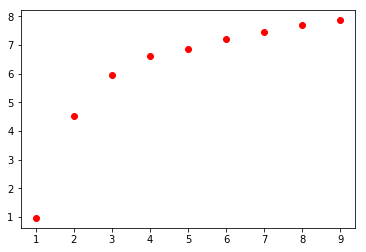

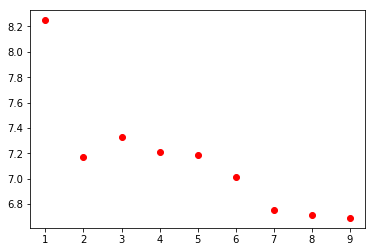

Max error indexes are 
 [10, 10, 10, 10, 10, 10, 10, 10, 51]
Max error values are 
 [array([36.4]), array([28.4]), array([26.63333333]), array([24.125]), array([24.7]), array([21.2]), array([19.64285714]), array([18.725]), array([18.1])]


In [31]:
### import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
#neigh = KNeighborsRegressor(n_neighbors=knn)
train23_err=[]
test23_err=[]
max_err_index=[]
max_err_val=[]
for k in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors=k)
    tr_in=train_in  #.iloc[:,0:k]
    tr_out=train_out#.iloc[:]
    ts_in=test_in#.iloc[:,0:k]
    ts_out=test_out#.iloc[:]
    neigh.fit(tr_in,tr_out)
    out1=neigh.predict(tr_in)
    out2=neigh.predict(ts_in)
    out1=np.reshape(out1,[349,1])
    out2=np.reshape(out2,[62,1])
    
    ts_out=np.asarray(ts_out)
    ts_out=np.reshape(ts_out,[62,1])
    #print(tr_out.shape)
    tr_out=np.asarray(tr_out)
    tr_out=np.reshape(tr_out,[349,1])
    
    temp=abs(out2-ts_out)
    indi=np.argmax(temp)
    m_err=temp[indi]
    max_err_index.append(indi)
    max_err_val.append(m_err)
    #print(m_err)
    e1=np.sqrt((np.sum((out1-tr_out)**2))/len(out1))
    e2=np.sqrt((np.sum((out2-ts_out)**2))/len(out2))
    train23_err.append(e1)
    test23_err.append(e2)
#print(train_err)
#train_err=np.asarray(train_err)
#test_err=np.asarray(test_err)
print("Train error for diff K is\n",train23_err) 
print("Test error for diff K is\n",test23_err)
plt.plot([1,2,3,4,5,6,7,8,9],train23_err,'ro')
plt.show()
plt.plot([1,2,3,4,5,6,7,8,9],test23_err,'ro')
plt.show()
print("Max error indexes are \n",max_err_index)
print("Max error values are \n",max_err_val)

#### Index of maimum error is shown. This Home might be an Exception/Outlier. To improve prediction on this dataset, we can scale features, vary the values of K, Use different Distance Metric

# Question Number 3

In [18]:
inp=df.iloc[:,1:3]
inp.head()
outp=df.iloc[:,-1]
outp.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: label, dtype: object

In [19]:
print(set(outp))
outp2=outp
outp.head()

{'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: label, dtype: object

In [20]:
for i in range(0,len(outp)):
    if (outp.iloc[i]=='Iris-setosa'):
        outp2.iloc[i]=0
    elif (outp.iloc[i]=='Iris-versicolor'):
        outp2.iloc[i]=1
    elif (outp.iloc[i]=='Iris-virginica'):
        outp2.iloc[i]=2


F:\Anacondaa\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'sepal_width')

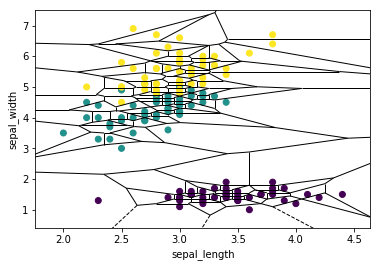

In [42]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(inp)

voronoi_plot_2d(vor, show_vertices=False, show_points=False)

plt.scatter(x=inp.iloc[:,0],
                y=inp.iloc[:,1],
                c=outp.iloc[:])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

###### References: 
Discussion Group: Ashish Kumar(18210014), Shubham Garg.
I also referred to https://nbviewer.jupyter.org/github/csiu/100daysofcode/blob/master/misc/day52_voronoi.ipynb